<a href="https://colab.research.google.com/github/PratikshaShetty5618/10DaysML/blob/master/Day8_MulticlassClassification_ConsumerComplaints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pratikshashetty5618","key":"3ee65ceee1a3c71de33d3c2d43ec950b"}'}

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets list

In [0]:
!kaggle datasets download -d dushyantv/consumer_complaints

 93% 132M/142M [00:01<00:00, 110MB/s] 
100% 142M/142M [00:01<00:00, 109MB/s]


In [0]:
!ls

consumer_complaints.zip  kaggle.json  sample_data


In [0]:
import pandas as pd

In [0]:
from zipfile import ZipFile

zip_file = ZipFile('/content/consumer_complaints.zip')

In [0]:
df=pd.read_csv(zip_file.open('Consumer_Complaints.csv'))

In [0]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID,Unnamed: 18
0,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217,NaN
1,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10-05-2016,Closed with explanation,Yes,No,2141773,NaN
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100,NaN
3,06-08-2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06-10-2014,Closed with explanation,Yes,Yes,885638,NaN
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760,NaN


In [0]:
df.shape

(1025010, 19)

In [0]:
col = ['Product', 'Consumer Complaint']
df= df[col]
df= df[pd.notnull(df['Consumer Complaint'])]

In [0]:
df.columns=['Product', 'Consumer_complaint']

In [0]:
df['category_id'] = df['Product'].factorize()[0]

In [0]:
cat_id_df = df[["Product", "category_id"]].drop_duplicates().sort_values('category_id')

In [0]:
cat_to_id = dict(cat_id_df.values)

In [0]:
id_to_cat = dict(cat_id_df[['category_id','Product']].values)

In [0]:
df.head()

,Product,Consumer_complaint,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2


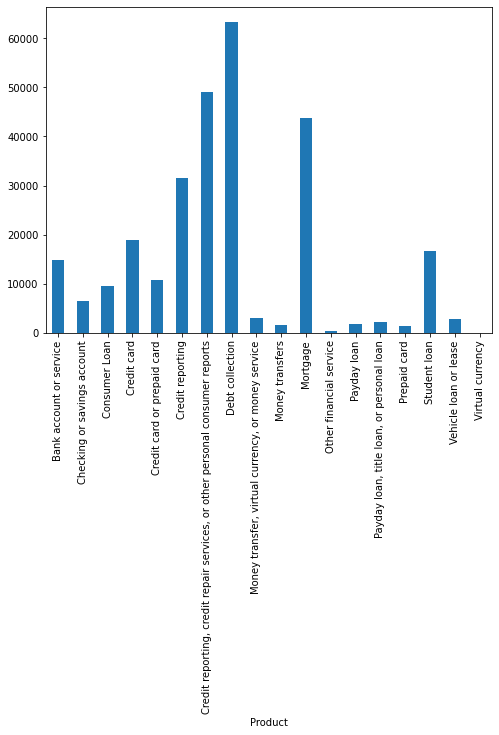

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (8,6))
df.groupby('Product').Consumer_complaint.count().plot.bar(ylim=0)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
tfidf = TfidfVectorizer(sublinear_tf= True, #use a logarithmic form for frequency
                       min_df = 5, #minimum numbers of documents a word must be present in to be kept
                       norm= 'l2', #ensure all our feature vectors have a euclidian norm of 1
                       ngram_range= (1,2), #to indicate that we want to consider both unigrams and bigrams.
                       stop_words ='english') #to remove all common pronouns to reduce the number of noisy features

In [0]:
print(len(df.Consumer_complaint))

277814


In [0]:
features = tfidf.fit_transform(df.Consumer_complaint[0:30000]).toarray()

KeyboardInterrupt: ignored

In [0]:
labels = df.category_id
features.shape

NameError: ignored

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint'], df['Product'], random_state= 0)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [0]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [0]:
print(clf.predict(count_vect.transform(['The credit card is not working'])))

['Credit card']


In [0]:
print(clf.predict(count_vect.transform(['I have transferred money, but not reached my friend'])))

['Money transfers']


In [0]:
print(clf.predict(count_vect.transform(['Home loan payment is not supported'])))

['Mortgage']


In [0]:
y_pred = clf.predict(count_vect.transform(X_test))


In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred, labels= df.Product, target_names=df['Product'].unique()))


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1989: UserWarning: labels size, 277814, does not match size of target_names, 18
  .format(len(labels), len(target_names))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                              precision    recall  f1-score   support

                                                            Credit reporting       0.76      0.28      0.41      7774
                                                               Consumer Loan       0.55      0.23      0.33      2272
                                                             Debt collection       0.76      0.28      0.41      7774
                                                                    Mortgage       0.88      0.69      0.77     15863
                                                                 Credit card       0.88      0.69      0.77     15863
                                                     Other financial service       0.93      0.90      0.91     11032
                                                     Bank account or service       0.93      0.90      0.91     11032
                                                       